In [8]:
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import numpy as np

paths = [path_effects.Stroke(linewidth=2, foreground='w'), path_effects.Normal()]


In [ ]:
Grav_const = 6.67430e-11
kms_to_ms = 1000
pc_to_m = 3.086e16

In [10]:
def load_data(key):
  import pickle
  if key=='GC':
    with open("../data/GC_birth.data", 'rb') as handle:
      b = pickle.load(handle)
  if key=='GCS':
    with open("../data/GC_survivors_birth.data", 'rb') as handle:
      b = pickle.load(handle)
  if key=='GCD':
    with open("../data/GCD_birth.data", 'rb') as handle:
      b = pickle.load(handle)
  return b
GC_data = load_data('GC')
GCS_data = load_data('GCS')
GCD_data = load_data('GCD')

def get_dict(key, d):
  if 0 in list(d.keys()):
    return np.array([d[i][key] for i in list(d.keys())])
  else:
      key_data = []
      for i in d.keys():
          for j in d[i].keys():
              key_data.append(d[i][j][key])
      return np.array(key_data)


In [11]:
i=0
print("GCDs: %s"%(len(GCD_data)))
for sim in GC_data.keys():
  i+=len(GC_data[sim])
print("Total GCs: %s"%(i))

i=0
for key in GCS_data.keys():
  if 13.8 - np.average(GCS_data[key]['Birth Times'],weights=GCS_data[key]['Masses'])/1000 > 10:
    i+=1

print("Total Surviving clusters with an Age > 10Gyr: %s"%(i))


GCDs: 6
Total GCs: 184
Total Surviving clusters with an Age > 10Gyr: 5


In [12]:
GC_redshift = get_dict('Redshift', GC_data)
GCS_redshift = get_dict('Redshift', GCS_data)
GCD_redshift = get_dict('Redshift', GCD_data)
GC_r200 = get_dict('Host 200c', GC_data)
GCS_r200 = get_dict('Host R200c', GCS_data)
GCD_r200 = get_dict('birth R200c', GCD_data)
GC_R = np.linalg.norm(get_dict('Galacto-centred position', GC_data), axis=1)
GCS_R = np.linalg.norm(get_dict('Galacto-centred position', GCS_data), axis=1)
GCD_R = get_dict('birth distance', GCD_data)
GC_r_tilde = GC_R / (0.015 * GC_r200)

GCS_r_tilde = GCS_R / (0.015 * GCS_r200)
GCD_r_tilde = GCD_R / (0.015 * GCD_r200)

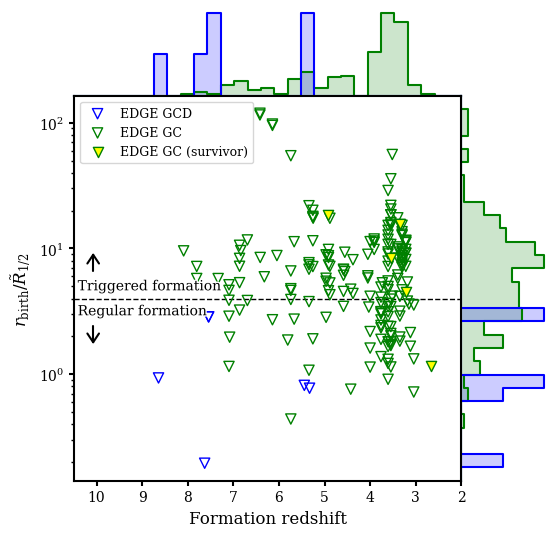

In [ ]:
fontsize = 12
lw = 1.5
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams['mathtext.fontset'] = 'dejavuserif'
plt.rcParams['font.size'] = fontsize
plt.rcParams['axes.labelsize'] = fontsize
plt.rcParams['axes.linewidth'] = lw
plt.rcParams['lines.linewidth'] = lw
plt.rcParams['lines.markersize'] = 3
plt.rcParams['xtick.labelsize'] = fontsize - 2
plt.rcParams['ytick.labelsize'] = fontsize - 2
plt.rcParams['xtick.major.width'] = lw
plt.rcParams['xtick.minor.width'] = lw * (2/3.)
plt.rcParams['ytick.major.width'] = lw
plt.rcParams['ytick.minor.width'] = lw * (2/3.)
plt.rcParams['legend.fontsize'] = fontsize - 2

fig, ax = plt.subplots(figsize=(5,5), nrows=1, ncols=1, gridspec_kw={'hspace':0., 'wspace':0.})

size = (plt.rcParams['lines.markersize']**2)*6
cbar_min, cbar_max = -5, 0

kwargs1 = {'facecolor':'yellow', 'marker':'v', 'edgecolor':'green', 'linewidth':1, 's':size}
kwargs2 = {'facecolor':'None', 'marker':'v', 'edgecolor':'blue', 'linewidth':1, 's':size}
kwargs3 = {'facecolor':'None', 'marker':'v', 'edgecolor':'green', 'linewidth':1, 's':size}

#---------------------------------------------------------------------------

# Plot data:
#---------------------------------------------------------------------------
ax.set_yscale('log')
ax.set_xlim(2, 10.5)
ax.scatter(GCD_redshift, GCD_r_tilde, label='EDGE GCD', zorder=3, **kwargs2)
ax.scatter(GC_redshift, GC_r_tilde, label='EDGE GC', zorder=1, **kwargs3)
ax.scatter(GCS_redshift, GCS_r_tilde, label='EDGE GC (survivor)', zorder=2, **kwargs1)

# A line to mark the delineator between different types:

kwargs = {'ls':'--', 'color':'black', 'alpha':1, 'linewidth':1, 'zorder':0}
delineator = 4
ax.axhline(delineator, **kwargs)

pad=1.65
ax.text(0.01, delineator*0.9, 'Regular formation', fontsize=fontsize-2, ha='left', va='top', path_effects=paths, transform=ax.get_yaxis_transform())
ax.plot([0.05, 0.05], [delineator*pad, delineator*pad*1.35], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')
ax.plot([0.05, 0.065], [delineator*pad*1.35, delineator*pad*1.15], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')
ax.plot([0.05, 0.035], [delineator*pad*1.35, delineator*pad*1.15], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')

ax.text(0.01, delineator*1.1, 'Triggered formation', fontsize=fontsize-2, ha='left', va='bottom', path_effects=paths, transform=ax.get_yaxis_transform())
ax.plot([0.05, 0.05], [delineator*(1/pad), delineator*(1/(pad*1.35))], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')
ax.plot([0.05, 0.065], [delineator*(1/(pad*1.35)), delineator*(1/(pad*1.15))], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')
ax.plot([0.05, 0.035], [delineator*(1/(pad*1.35)), delineator*(1/(pad*1.15))], transform=ax.get_yaxis_transform(), lw=lw, color='k', solid_capstyle='round')

# Histogram axes:
size = 0.225
l, b, w, h = ax.get_position().bounds
hax_x = fig.add_axes([l, b+h, w, h*size], zorder=-1)
hax_y = fig.add_axes([l+w, b, w*size, h], zorder=-1)

# Histogram:
density = True
kwargs = {'lw':0, 'clip_on':False, 'alpha':0.2}
plt.draw()
N_bins = 30
Rbirth_bins = np.logspace(*np.log10(ax.get_ylim()), N_bins)
zbirth_bins = np.linspace(*ax.get_xlim(), N_bins)

redshifts = [np.concatenate([GC_redshift, GCS_redshift]), GCD_redshift]
r_tildes = [np.concatenate([GC_r_tilde, GCS_r_tilde]), GCD_r_tilde]
for colour, redshift, r_tilde in zip(['green', 'blue'], redshifts, r_tildes):
  hist = np.histogram(redshift, bins=zbirth_bins, density=density)
  hist = np.append(np.append(0, hist[0]), 0)
  hist /= np.max(hist)
  hax_x.fill_between(x=zbirth_bins, y1=0, y2=hist[:-1], color=colour, step='pre', **kwargs)
  hax_x.step(np.append(ax.get_xlim()[0], zbirth_bins), hist, where='post', color=colour, lw=1.5, clip_on=False)

  hist = np.histogram(np.log10(r_tilde), bins=np.log10(Rbirth_bins), density=density)
  hist = np.append(np.append(0, hist[0]), 0)
  hist /= np.max(hist)
  hax_y.fill_betweenx(y=Rbirth_bins, x1=0, x2=hist[1:], color=colour, step='post', **kwargs)
  hax_y.step(hist, np.append(ax.get_ylim()[0], Rbirth_bins), where='pre', color=colour, lw=1.5, clip_on=False)

# Tick stylings:
hax_x.set_xlim(ax.get_xlim())
hax_y.set_ylim(ax.get_ylim())
hax_y.set_yscale('log')
hax_x.set_xticks([])
hax_x.set_yticks([])
hax_y.set_xticks([])
hax_y.set_yticks([])
hax_x.set_axis_off()
hax_y.set_axis_off()

hax_x.set_ylim(ymin=0)
hax_y.set_xlim(xmin=0)
ax.invert_xaxis()
hax_x.invert_xaxis()

ax.set_xlabel('Formation redshift')
ax.set_ylabel(r'$r_{\rm birth} / \tilde{R}_{1/2}$')

ax.legend(loc='upper left', fontsize=fontsize-3, columnspacing=0.3)
#---------------------------------------------------------------------------

plt.savefig('../Figures/Fig2.pdf', bbox_inches='tight')
plt.savefig('../Figures/Fig2.png', bbox_inches='tight',dpi=750)
